<a href="https://colab.research.google.com/github/ojonugwa485/AI/blob/main/MLP_vs_Linear_Regression_A_Simple_Demo_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


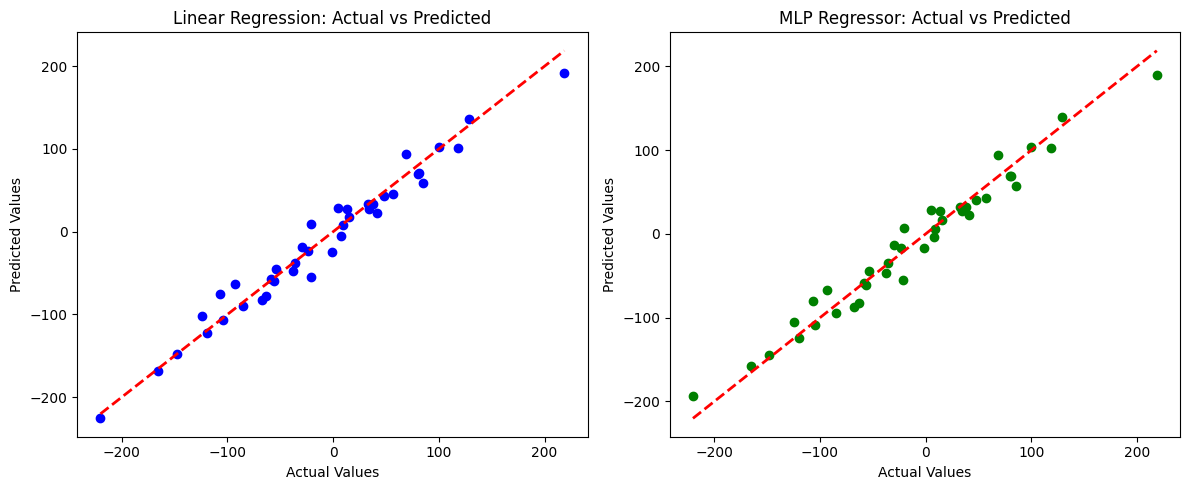


Performance Metrics:
Linear Regression - R²: 0.9681, MSE: 246.1218
MLP Regressor - R²: 0.9655, MSE: 265.7765


In [4]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error # Import evaluation metrics
import matplotlib.pyplot as plt

# 1. Generate sample dataset (features X and target y)
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# 2. Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 4. Train Neural Network (MLP Regressor)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, random_state=42) # Increased max_iter again
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# 5. Visualization - Compare Actual vs Predicted
plt.figure(figsize=(12, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")

# MLP Regressor Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_mlp, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLP Regressor: Actual vs Predicted")

plt.tight_layout()
plt.show()

# 6. Performance Comparison (R² score, MSE)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

print("\nPerformance Metrics:")
print(f"Linear Regression - R²: {r2_lin:.4f}, MSE: {mse_lin:.4f}")
print(f"MLP Regressor - R²: {r2_mlp:.4f}, MSE: {mse_mlp:.4f}")